<a href="https://colab.research.google.com/github/javier-jaime/Route-Recommender/blob/main/Container_Optimization_with_RectPack_Rev_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install necessary Libraries

In [ ]:
!pip install rectpack # Uncomment to install
import pandas as pd
import numpy as np
from rectpack import newPacker
import rectpack.packer as packer
import matplotlib.pyplot as plt

  Created wheel for rectpack: filename=rectpack-0.2.2-py3-none-any.whl size=19347 sha256=91650eb08a569840d52158502737a0eb8d850169ce7f2b95af6d817ebba65822
  Stored in directory: /root/.cache/pip/wheels/28/47/3b/b15e9185694107b3faf5d4b1d31fcce502d6903c2c76c71e32
Successfully built rectpack


## Optimization Model Helper functions

In [ ]:
# Pallets Count
# European Pallet Dimension: 80 x 120 cm

bx = 0 # Buffer x
by = 0 # Buffer y
pal_812 = [80 + bx, 120 + by]

# American Pallet Dimension: ISO 40” x 48" (121.9 cm x 101.6 cm)
pal_1012 = [101.6 + bx, 121.9 + by]

# Container size
bins20 = [(236, 595)] 
bins40 = [(236, 1203.4)]
bins53 = [(251.5, 1585)] 

In [ ]:
# Function Solver
def solver(n_812, n_1012, bins):
    # Pallets to load
    rectangles = [pal_812 for i in range(n_812)] + [pal_1012 for i in range(n_1012)]
    
    # Build the Packer
    pack = newPacker(mode = packer.PackingMode.Offline, bin_algo = packer.PackingBin.Global,
                     rotation=True)

    # Add the rectangles to packing queue
    for r in rectangles:
        pack.add_rect(*r)

    # Add the bins where the rectangles will be placed
    for b in bins:
        pack.add_bin(*b)

    # Start packing
    pack.pack()
    
    # Full rectangle list
    all_rects = pack.rect_list()

    # Pallets with dimensions
    all_pals = [sorted([p[3], p[4]]) for p in all_rects]

    # Count number of 80 x 120 
    p_812, p_1012 = all_pals.count(pal_812), all_pals.count(pal_1012)
    print("{:,}/{:,} Pallets 80 x 120 (cm) | {:,}/{:,} Pallets 40 x 48 (in)".format(p_812, n_812, p_1012, n_1012))
    
    return all_rects, all_pals

In [ ]:
def plot_solution(all_rects, pal_812, pal_1012):
    # Plot
    plt.figure(figsize=(10,20))
    # Loop all rect
    for rect in all_rects:
        b, x, y, w, h, rid = rect
        x1, x2, x3, x4, x5 = x, x+w, x+w, x, x
        y1, y2, y3, y4, y5 = y, y, y+h, y+h,y

        # Pallet type
        if [w, h] == pal_812:
            color = '--k'
        if [w, h] == pal_1012:
            color = '--r'
        else:
            color = '--y'

        plt.plot([x1,x2,x3,x4,x5],[y1,y2,y3,y4,y5], color)
    
    plt.show()

---

#### 100% US Pallet (40" x 48") | 20' Container

0/0 Pallets 80 x 120 (cm) | 9/10 Pallets 40 x 48 (in)


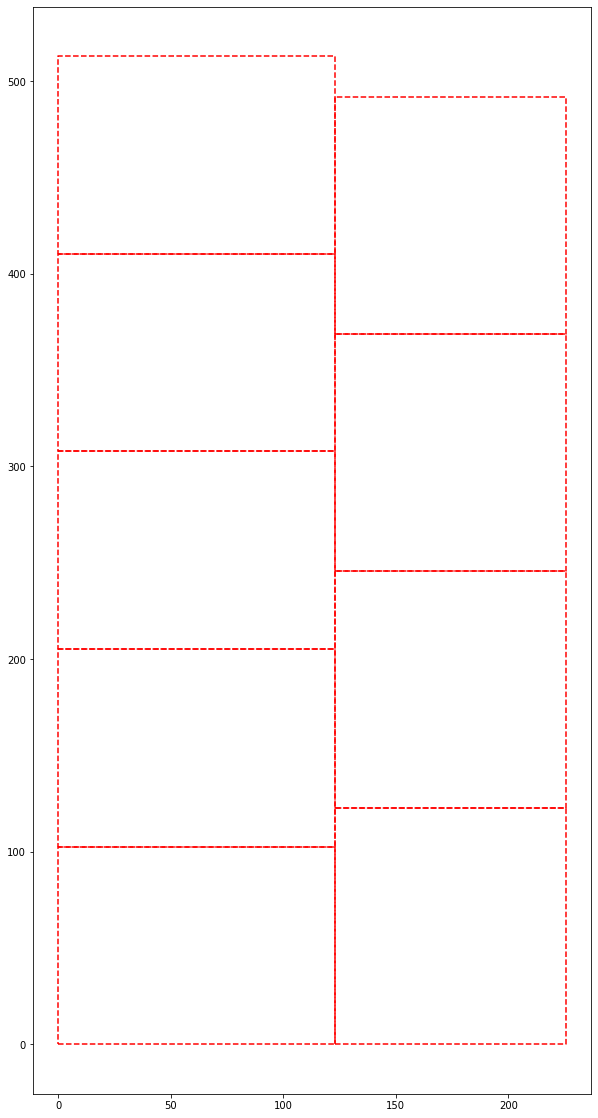

In [ ]:
# Test 1
n_812 = 0
n_1012 = 10
all_rects, all_pals = solver(n_812, n_1012, bins20)
plot_solution(all_rects, pal_812, pal_1012)

#### 100% US Pallet (100 x 120 cm) | 40'

12/20 Pallets 80 x 120 (cm) | 10/10 Pallets 40 x 48 (in)


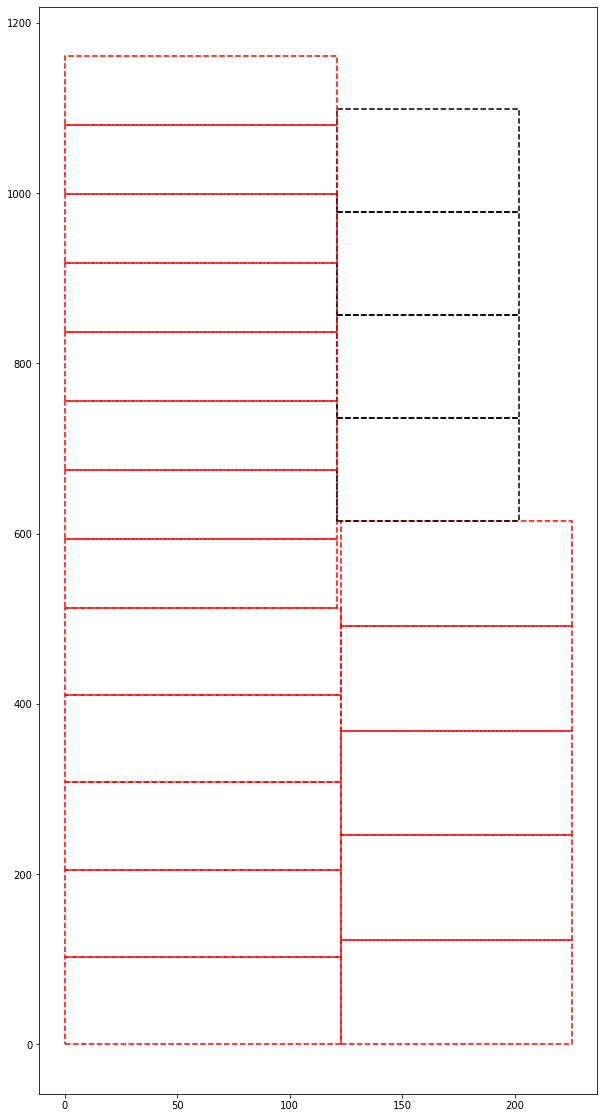

In [ ]:
# Test 2
n_812 = 20
n_1012 = 10
all_rects, all_pals = solver(n_812, n_1012, bins40)
plot_solution(all_rects, pal_812, pal_1012)

#### 100% EU Pallet (100 x 120 cm) | 20'

11/12 Pallets 80 x 120 (cm) | 0/0 Pallets 40 x 48 (in)


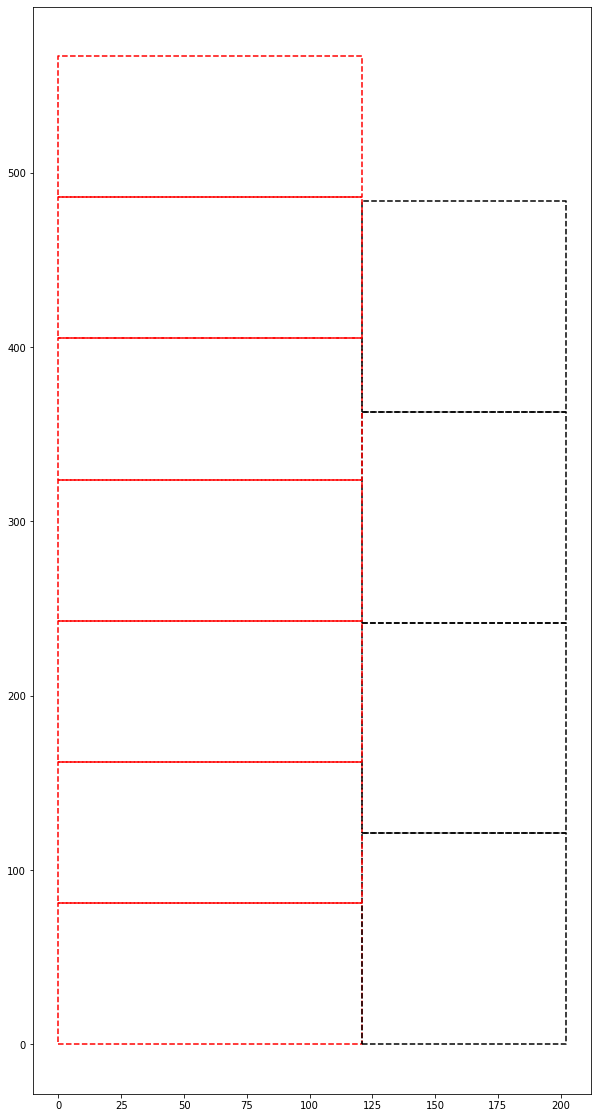

In [ ]:
# Test 3
n_812 = 12
n_1012 = 0
all_rects, all_pals = solver(n_812, n_1012, bins20)
plot_solution(all_rects, pal_812, pal_1012)